In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [103]:
file_path = "temp/sentiment140.csv"

columns = ["target", "ids", "date", "flag", "user", "text"]

df = pd.read_csv(
    file_path,
    encoding="utf-8",
    encoding_errors="ignore",
    header=None,
    names=columns,
)

display(df.head())

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [104]:
NEGATIVE = 0
NEUTRAL = 2
POSITIVE = 4

SAMPLE_SIZE = 100000
SAMPLING_SEED = 12345

positive_tweets = df[df["target"] == POSITIVE]["text"]
negative_tweets = df[df["target"] == NEGATIVE]["text"]

positive_sample = positive_tweets.sample(
    n=SAMPLE_SIZE, random_state=SAMPLING_SEED
)
negative_sample = negative_tweets.sample(
    n=SAMPLE_SIZE, random_state=SAMPLING_SEED
)

display(positive_sample.head())
display(negative_sample.head())

positive_text = " ".join(positive_sample)
negative_text = " ".join(negative_sample)

903497     @cbedon thanks alot. Hope you can help spread ...
825242                   @CarinaK Do you cook Chinese food? 
1275022         crunch then sleepytime. goodnight tweeters! 
927212     @chrisgeidner  really really enjoy reading you...
1172897    @brittanytastic ooh, sounds fun  never been in...
Name: text, dtype: object

103497    i hate the rain so much, especially when it ge...
25242                                           rain again 
475022    out now. I can't concentrate! stop it dj!  I h...
127212                   Owww who put pushpins on mu floor 
372897    Upset that Raul and Roman are leaving to Seatt...
Name: text, dtype: object

In [105]:
wordcloud_positive = WordCloud(
    width=800, height=400, max_words=200, colormap="Blues"
).generate(positive_text)
wordcloud_negative = WordCloud(
    width=800, height=400, max_words=200, colormap="Reds"
).generate(negative_text)

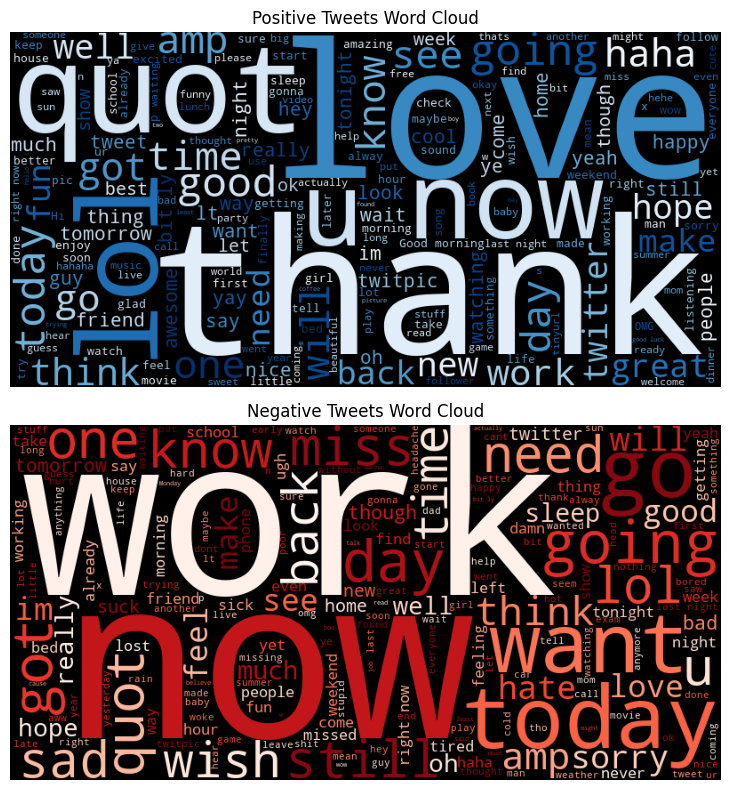

In [106]:
# Visualization
plt.figure(figsize=(16, 8))

# Positive Word Cloud
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.title("Positive Tweets Word Cloud")

# Negative Word Cloud
plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.title("Negative Tweets Word Cloud")

plt.tight_layout()
plt.show()